#10-701 Final Project

We will train an inverse reinforcement learning algorithm to create satisfying patterns in the game 'Conway's game of life'

## 1. Basic Setup for Conway's Game of Life

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_pattern(grid_size=(10, 10), density=0.3):
    """Generate a random initial pattern."""
    return (np.random.rand(*grid_size) < density).astype(int)

def step_game_of_life(grid):
    """Apply Conway's rules to evolve the pattern."""
    neighbors = sum(np.roll(np.roll(grid, i, 0), j, 1)
                    for i, j in [(-1, -1), (-1, 0), (-1, 1),
                                 (0, -1),        (0, 1),
                                 (1, -1),  (1, 0), (1, 1)])
    return (neighbors == 3) | ((grid == 1) & (neighbors == 2)).astype(int)

def simulate_game(grid, steps=5):
    """Simulate the game for a given number of steps."""
    for _ in range(steps):
        grid = step_game_of_life(grid)
    return grid

def display_pattern(pattern, title="Conway's Game of Life Pattern"):
    """Display the pattern."""
    plt.figure(figsize=(6, 6))
    plt.imshow(pattern, cmap='binary', interpolation='nearest')
    plt.title(title)
    plt.axis('off')
    plt.show()

## 2. Collect user feedback

In [9]:
def get_user_feedback(pattern):
    """
    Display pattern to the user and collect feedback.
    For now, simulate feedback by assigning a random score.
    Replace this with actual user input collection.
    """
    # Simulated feedback
    return np.random.randint(1, 11)  # User rating (1-10)


## 3. Inverse Reinforcement Learning

In [7]:
class PreferenceModel:
    """Model to learn user preferences."""
    def __init__(self, grid_size=(10, 10)):
        self.weights = np.random.rand(*grid_size)  # Initialize random weights

    def predict_score(self, pattern):
        """Predict user satisfaction for a pattern."""
        return np.sum(self.weights * pattern)

    def update_weights(self, pattern, user_feedback, learning_rate=0.1):
        """Update weights based on user feedback."""
        predicted = self.predict_score(pattern)
        error = user_feedback - predicted
        self.weights += learning_rate * error * pattern

Iteration 1


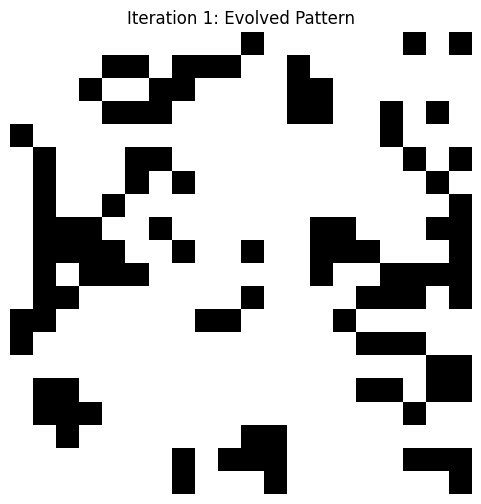

Updated weights:
[[ 6.24930140e-01  4.47680349e-02  9.28597520e-01  8.28704628e-02
   6.84852697e-01  8.06463658e-01  1.25351504e-01  7.87914669e-01
   8.20859506e-02  8.42007779e-01 -4.63184476e+00  4.14039953e-03
   3.27587125e-01  7.09904065e-01  3.27529269e-01  3.36979012e-01
   4.51352513e-02 -4.32991097e+00  9.94553561e-01 -4.61078033e+00]
 [ 2.43632804e-01  4.79152780e-03  7.42184383e-03  4.48879006e-01
  -4.77951625e+00 -4.32173191e+00  1.80183792e-01 -4.23351647e+00
  -4.70937172e+00 -4.50314086e+00  2.27868457e-01  3.52490954e-01
  -4.77062704e+00  9.54536970e-01  2.52877103e-01  5.91542957e-01
   9.48302194e-01  3.56512014e-01  4.96054822e-01  2.06303930e-01]
 [ 7.34582056e-02  9.21422830e-01  8.67033540e-01 -4.41559077e+00
   4.81431218e-01  1.06475827e-01 -3.99808482e+00 -4.24187659e+00
   2.43192250e-01  6.37997514e-01  7.87723783e-01  8.45006981e-01
  -4.74805773e+00 -4.45573876e+00  4.02420164e-01  4.56395680e-01
   2.44802104e-01  9.53257065e-01  2.58693764e-01  6.1284

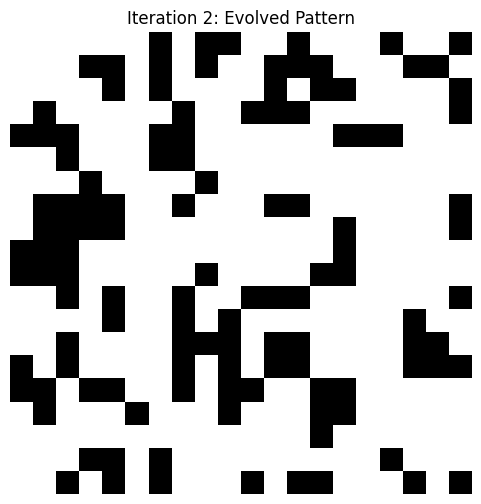

Updated weights:
[[ 6.24930140e-01  4.47680349e-02  9.28597520e-01  8.28704628e-02
   6.84852697e-01  8.06463658e-01  1.13509307e+01  7.87914669e-01
   1.13076651e+01  1.20675869e+01 -4.63184476e+00  4.14039953e-03
   1.15531663e+01  7.09904065e-01  3.27529269e-01  3.36979012e-01
   1.12707144e+01 -4.32991097e+00  9.94553561e-01  6.61479884e+00]
 [ 2.43632804e-01  4.79152780e-03  7.42184383e-03  1.16744582e+01
   6.44606292e+00 -4.32173191e+00  1.14057630e+01 -4.23351647e+00
   6.51620745e+00 -4.50314086e+00  2.27868457e-01  1.15780701e+01
   6.45495213e+00  1.21801161e+01  2.52877103e-01  5.91542957e-01
   9.48302194e-01  1.15820912e+01  1.17216340e+01  2.06303930e-01]
 [ 7.34582056e-02  9.21422830e-01  8.67033540e-01 -4.41559077e+00
   1.17070104e+01  1.06475827e-01  7.22749435e+00 -4.24187659e+00
   2.43192250e-01  6.37997514e-01  7.87723783e-01  1.20705861e+01
  -4.74805773e+00  6.76984041e+00  1.16279993e+01  4.56395680e-01
   2.44802104e-01  9.53257065e-01  2.58693764e-01  1.1838

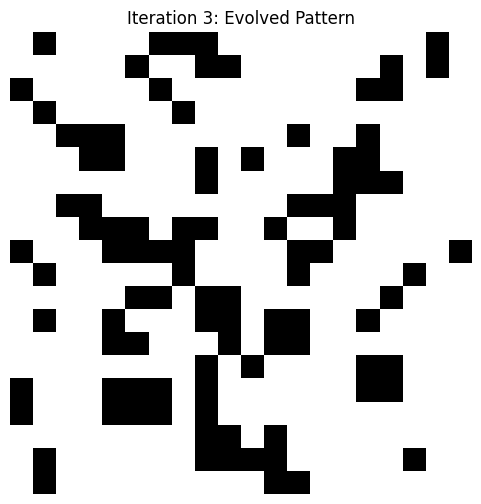

Updated weights:
[[ 6.24930140e-01 -2.36621526e+01  9.28597520e-01  8.28704628e-02
   6.84852697e-01  8.06463658e-01 -1.23559899e+01 -2.29190059e+01
  -1.23992555e+01  1.20675869e+01 -4.63184476e+00  4.14039953e-03
   1.15531663e+01  7.09904065e-01  3.27529269e-01  3.36979012e-01
   1.12707144e+01 -4.32991097e+00 -2.27123670e+01  6.61479884e+00]
 [ 2.43632804e-01  4.79152780e-03  7.42184383e-03  1.16744582e+01
   6.44606292e+00 -2.80286525e+01  1.14057630e+01 -4.23351647e+00
  -1.71907131e+01 -2.82100615e+01  2.27868457e-01  1.15780701e+01
   6.45495213e+00  1.21801161e+01  2.52877103e-01  5.91542957e-01
  -2.27586184e+01  1.15820912e+01 -1.19852866e+01  2.06303930e-01]
 [-2.36334624e+01  9.21422830e-01  8.67033540e-01 -4.41559077e+00
   1.17070104e+01  1.06475827e-01 -1.64794263e+01 -4.24187659e+00
   2.43192250e-01  6.37997514e-01  7.87723783e-01  1.20705861e+01
  -4.74805773e+00  6.76984041e+00  1.16279993e+01 -2.32505249e+01
  -2.34621185e+01  9.53257065e-01  2.58693764e-01  1.1838

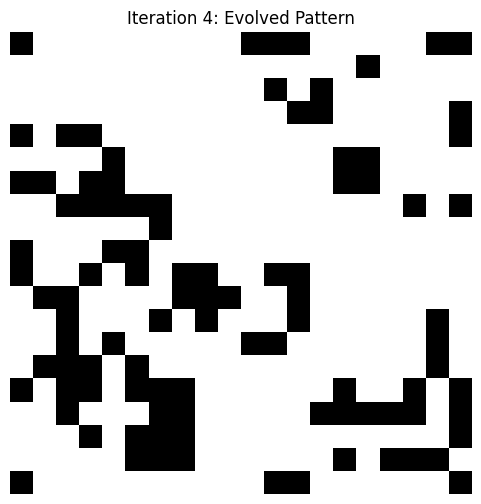

Updated weights:
[[ 3.72671552e+01 -2.36621526e+01  9.28597520e-01  8.28704628e-02
   6.84852697e-01  8.06463658e-01 -1.23559899e+01 -2.29190059e+01
  -1.23992555e+01  1.20675869e+01  3.20103803e+01  3.66463654e+01
   4.81953913e+01  7.09904065e-01  3.27529269e-01  3.36979012e-01
   1.12707144e+01 -4.32991097e+00  1.39298580e+01  4.32570238e+01]
 [ 2.43632804e-01  4.79152780e-03  7.42184383e-03  1.16744582e+01
   6.44606292e+00 -2.80286525e+01  1.14057630e+01 -4.23351647e+00
  -1.71907131e+01 -2.82100615e+01  2.27868457e-01  1.15780701e+01
   6.45495213e+00  1.21801161e+01  2.52877103e-01  3.72337680e+01
  -2.27586184e+01  1.15820912e+01 -1.19852866e+01  2.06303930e-01]
 [-2.36334624e+01  9.21422830e-01  8.67033540e-01 -4.41559077e+00
   1.17070104e+01  1.06475827e-01 -1.64794263e+01 -4.24187659e+00
   2.43192250e-01  6.37997514e-01  7.87723783e-01  4.87128112e+01
  -4.74805773e+00  4.34120654e+01  1.16279993e+01 -2.32505249e+01
  -2.34621185e+01  9.53257065e-01  2.58693764e-01  1.1838

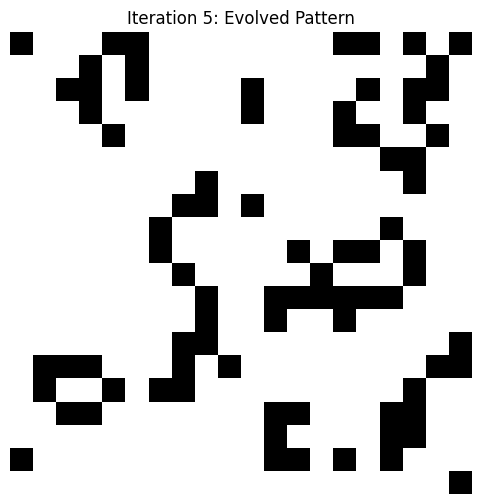

Updated weights:
[[-1.24833104e+01 -2.36621526e+01  9.28597520e-01  8.28704628e-02
  -4.90656129e+01 -4.89440019e+01 -1.23559899e+01 -2.29190059e+01
  -1.23992555e+01  1.20675869e+01  3.20103803e+01  3.66463654e+01
   4.81953913e+01  7.09904065e-01 -4.94229363e+01 -4.94134865e+01
   1.12707144e+01 -5.40803765e+01  1.39298580e+01 -6.49344170e+00]
 [ 2.43632804e-01  4.79152780e-03  7.42184383e-03 -3.80760074e+01
   6.44606292e+00 -7.77791181e+01  1.14057630e+01 -4.23351647e+00
  -1.71907131e+01 -2.82100615e+01  2.27868457e-01  1.15780701e+01
   6.45495213e+00  1.21801161e+01  2.52877103e-01  3.72337680e+01
  -2.27586184e+01  1.15820912e+01 -6.17357522e+01  2.06303930e-01]
 [-2.36334624e+01  9.21422830e-01 -4.88834320e+01 -5.41660563e+01
   1.17070104e+01 -4.96439897e+01 -1.64794263e+01 -4.24187659e+00
   2.43192250e-01  6.37997514e-01 -4.89627418e+01  4.87128112e+01
  -4.74805773e+00  4.34120654e+01  1.16279993e+01 -7.30009905e+01
  -2.34621185e+01 -4.87972085e+01 -4.94917718e+01  1.1838

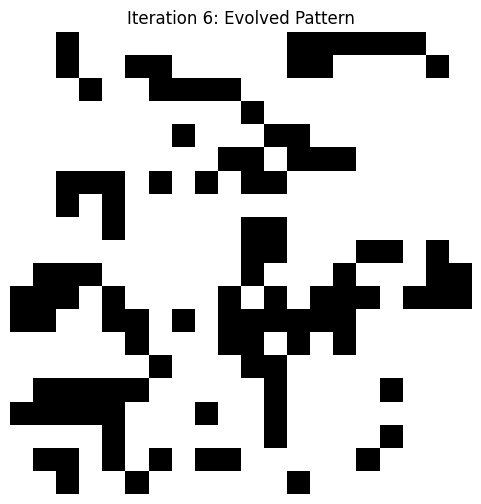

Updated weights:
[[-1.24833104e+01 -2.36621526e+01  9.00733659e+01  8.28704628e-02
  -4.90656129e+01 -4.89440019e+01 -1.23559899e+01 -2.29190059e+01
  -1.23992555e+01  1.20675869e+01  3.20103803e+01  3.66463654e+01
   1.37340160e+02  8.98546724e+01  3.97218321e+01  3.97312818e+01
   1.00415483e+02  3.50643918e+01  1.39298580e+01 -6.49344170e+00]
 [ 2.43632804e-01  4.79152780e-03  8.91521902e+01 -3.80760074e+01
   6.44606292e+00  1.13656503e+01  1.00550531e+02 -4.23351647e+00
  -1.71907131e+01 -2.82100615e+01  2.27868457e-01  1.15780701e+01
   9.55997205e+01  1.01324884e+02  2.52877103e-01  3.72337680e+01
  -2.27586184e+01  1.15820912e+01  2.74090162e+01  2.06303930e-01]
 [-2.36334624e+01  9.21422830e-01 -4.88834320e+01  3.49787120e+01
   1.17070104e+01 -4.96439897e+01  7.26653421e+01  8.49028918e+01
   8.93879606e+01  8.97827659e+01 -4.89627418e+01  4.87128112e+01
  -4.74805773e+00  4.34120654e+01  1.16279993e+01 -7.30009905e+01
  -2.34621185e+01 -4.87972085e+01 -4.94917718e+01  1.1838

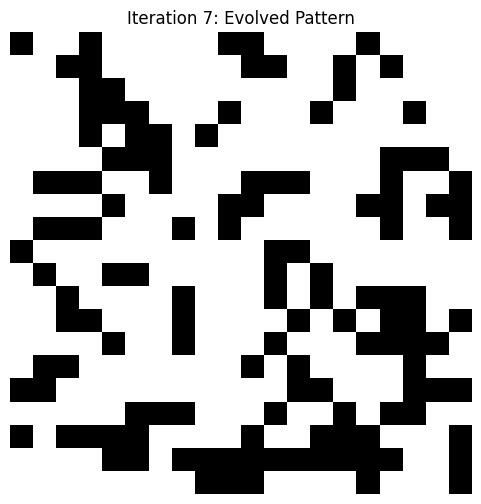

Updated weights:
[[-2.21053340e+02 -2.36621526e+01  9.00733659e+01 -2.08487159e+02
  -4.90656129e+01 -4.89440019e+01 -1.23559899e+01 -2.29190059e+01
  -1.23992555e+01 -1.96502443e+02 -1.76559649e+02  3.66463654e+01
   1.37340160e+02  8.98546724e+01  3.97218321e+01 -1.68838748e+02
   1.00415483e+02  3.50643918e+01  1.39298580e+01 -6.49344170e+00]
 [ 2.43632804e-01  4.79152780e-03 -1.19417839e+02 -2.46646037e+02
   6.44606292e+00  1.13656503e+01  1.00550531e+02 -4.23351647e+00
  -1.71907131e+01 -2.82100615e+01 -2.08342161e+02 -1.96991960e+02
   9.55997205e+01  1.01324884e+02 -2.08317153e+02  3.72337680e+01
  -2.31328648e+02  1.15820912e+01  2.74090162e+01  2.06303930e-01]
 [-2.36334624e+01  9.21422830e-01 -4.88834320e+01 -1.73591318e+02
  -1.96863019e+02 -4.96439897e+01  7.26653421e+01  8.49028918e+01
   8.93879606e+01  8.97827659e+01 -4.89627418e+01  4.87128112e+01
  -4.74805773e+00  4.34120654e+01 -1.96942030e+02 -7.30009905e+01
  -2.34621185e+01 -4.87972085e+01 -4.94917718e+01  1.1838

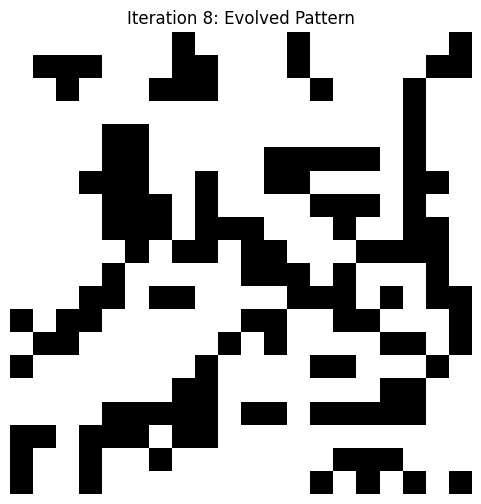

Updated weights:
[[-2.21053340e+02 -2.36621526e+01  9.00733659e+01 -2.08487159e+02
  -4.90656129e+01 -4.89440019e+01 -1.23559899e+01  5.56200564e+02
  -1.23992555e+01 -1.96502443e+02 -1.76559649e+02  3.66463654e+01
   7.16459729e+02  8.98546724e+01  3.97218321e+01 -1.68838748e+02
   1.00415483e+02  3.50643918e+01  1.39298580e+01  5.72626128e+02]
 [ 2.43632804e-01  5.79124361e+02  4.59701730e+02  3.32473532e+02
   6.44606292e+00  1.13656503e+01  1.00550531e+02  5.74886053e+02
   5.61928856e+02 -2.82100615e+01 -2.08342161e+02 -1.96991960e+02
   6.74719290e+02  1.01324884e+02 -2.08317153e+02  3.72337680e+01
  -2.31328648e+02  1.15820912e+01  6.06528586e+02  5.79325873e+02]
 [-2.36334624e+01  9.21422830e-01  5.30236137e+02 -1.73591318e+02
  -1.96863019e+02 -4.96439897e+01  6.51784912e+02  6.64022461e+02
   6.68507530e+02  8.97827659e+01 -4.89627418e+01  4.87128112e+01
  -4.74805773e+00  6.22531635e+02 -1.96942030e+02 -7.30009905e+01
  -2.34621185e+01  5.30322361e+02 -4.94917718e+01  1.1838

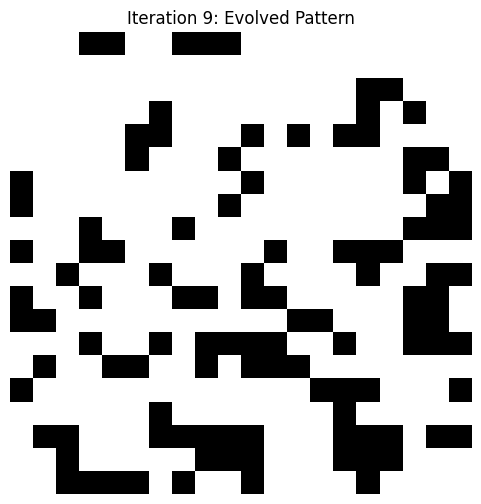

Updated weights:
[[-2.21053340e+02 -2.36621526e+01  9.00733659e+01 -1.31574846e+03
  -1.15632692e+03 -4.89440019e+01 -1.23559899e+01 -5.51060740e+02
  -1.11966056e+03 -1.30376375e+03 -1.76559649e+02  3.66463654e+01
   7.16459729e+02  8.98546724e+01  3.97218321e+01 -1.68838748e+02
   1.00415483e+02  3.50643918e+01  1.39298580e+01  5.72626128e+02]
 [ 2.43632804e-01  5.79124361e+02  4.59701730e+02  3.32473532e+02
   6.44606292e+00  1.13656503e+01  1.00550531e+02  5.74886053e+02
   5.61928856e+02 -2.82100615e+01 -2.08342161e+02 -1.96991960e+02
   6.74719290e+02  1.01324884e+02 -2.08317153e+02  3.72337680e+01
  -2.31328648e+02  1.15820912e+01  6.06528586e+02  5.79325873e+02]
 [-2.36334624e+01  9.21422830e-01  5.30236137e+02 -1.73591318e+02
  -1.96863019e+02 -4.96439897e+01  6.51784912e+02  6.64022461e+02
   6.68507530e+02  8.97827659e+01 -4.89627418e+01  4.87128112e+01
  -4.74805773e+00  6.22531635e+02 -1.96942030e+02 -1.18026229e+03
  -1.13072342e+03  5.30322361e+02 -4.94917718e+01  1.1838

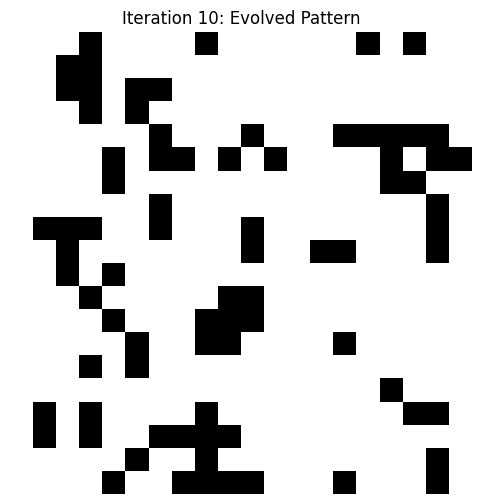

Updated weights:
[[-2.21053340e+02 -2.36621526e+01  9.00733659e+01  7.75563277e+02
  -1.15632692e+03 -4.89440019e+01 -1.23559899e+01 -5.51060740e+02
   9.71651180e+02 -1.30376375e+03 -1.76559649e+02  3.66463654e+01
   7.16459729e+02  8.98546724e+01  3.97218321e+01  1.92247299e+03
   1.00415483e+02  2.12637613e+03  1.39298580e+01  5.72626128e+02]
 [ 2.43632804e-01  5.79124361e+02  2.55101347e+03  2.42378527e+03
   6.44606292e+00  1.13656503e+01  1.00550531e+02  5.74886053e+02
   5.61928856e+02 -2.82100615e+01 -2.08342161e+02 -1.96991960e+02
   6.74719290e+02  1.01324884e+02 -2.08317153e+02  3.72337680e+01
  -2.31328648e+02  1.15820912e+01  6.06528586e+02  5.79325873e+02]
 [-2.36334624e+01  9.21422830e-01  2.62154788e+03  1.91772042e+03
  -1.96863019e+02  2.04166775e+03  2.74309665e+03  6.64022461e+02
   6.68507530e+02  8.97827659e+01 -4.89627418e+01  4.87128112e+01
  -4.74805773e+00  6.22531635e+02 -1.96942030e+02 -1.18026229e+03
  -1.13072342e+03  5.30322361e+02 -4.94917718e+01  1.1838

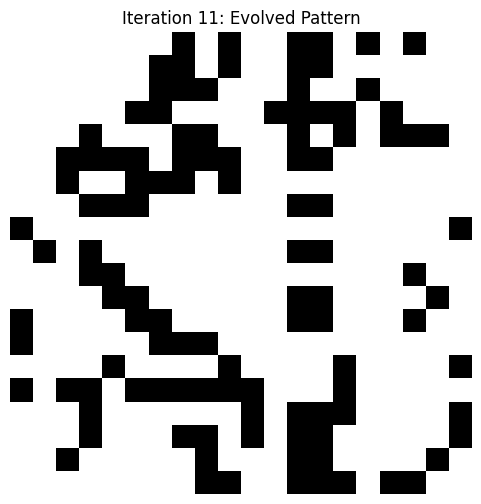

Updated weights:
[[-2.21053340e+02 -2.36621526e+01  9.00733659e+01  7.75563277e+02
  -1.15632692e+03 -4.89440019e+01 -1.23559899e+01 -3.95104135e+03
   9.71651180e+02 -4.70374436e+03 -1.76559649e+02  3.66463654e+01
  -2.68352088e+03 -3.31012594e+03  3.97218321e+01 -1.47750762e+03
   1.00415483e+02 -1.27360448e+03  1.39298580e+01  5.72626128e+02]
 [ 2.43632804e-01  5.79124361e+02  2.55101347e+03  2.42378527e+03
   6.44606292e+00  1.13656503e+01 -3.29943008e+03 -2.82509456e+03
   5.61928856e+02 -3.42819067e+03 -2.08342161e+02 -1.96991960e+02
  -2.72526132e+03 -3.29865572e+03 -2.08317153e+02  3.72337680e+01
  -2.31328648e+02  1.15820912e+01  6.06528586e+02  5.79325873e+02]
 [-2.36334624e+01  9.21422830e-01  2.62154788e+03  1.91772042e+03
  -1.96863019e+02  2.04166775e+03 -6.56883958e+02 -2.73595815e+03
  -2.73147308e+03  8.97827659e+01 -4.89627418e+01  4.87128112e+01
  -3.40472867e+03  6.22531635e+02 -1.96942030e+02 -4.58024290e+03
  -1.13072342e+03  5.30322361e+02 -4.94917718e+01  1.1838

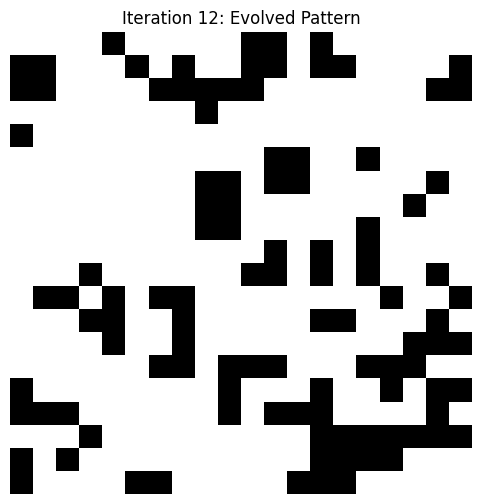

Updated weights:
[[-2.21053340e+02 -2.36621526e+01  9.00733659e+01  7.75563277e+02
   7.01749483e+03 -4.89440019e+01 -1.23559899e+01 -3.95104135e+03
   9.71651180e+02 -4.70374436e+03  7.99726210e+03  8.21046811e+03
  -2.68352088e+03  4.86369581e+03  3.97218321e+01 -1.47750762e+03
   1.00415483e+02 -1.27360448e+03  1.39298580e+01  5.72626128e+02]
 [ 8.17406538e+03  8.75294611e+03  2.55101347e+03  2.42378527e+03
   6.44606292e+00  8.18518740e+03 -3.29943008e+03  5.34872719e+03
   5.61928856e+02 -3.42819067e+03  7.96547959e+03  7.97682979e+03
  -2.72526132e+03  4.87516602e+03  7.96550459e+03  3.72337680e+01
  -2.31328648e+02  1.15820912e+01  6.06528586e+02  8.75314762e+03]
 [ 8.15018828e+03  8.17474317e+03  2.62154788e+03  1.91772042e+03
  -1.96863019e+02  2.04166775e+03  7.51693779e+03  5.43786360e+03
   5.44234867e+03  8.26360451e+03  8.12485901e+03  4.87128112e+01
  -3.40472867e+03  6.22531635e+02 -1.96942030e+02 -4.58024290e+03
  -1.13072342e+03  5.30322361e+02  8.12432998e+03  8.1856

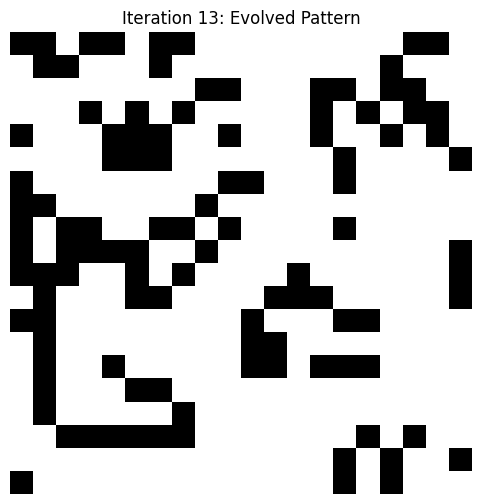

Updated weights:
[[-1.30059429e+04 -1.28085518e+04  9.00733659e+01 -1.20093263e+04
  -5.76739478e+03 -4.89440019e+01 -1.27972456e+04 -1.67359310e+04
   9.71651180e+02 -4.70374436e+03  7.99726210e+03  8.21046811e+03
  -2.68352088e+03  4.86369581e+03  3.97218321e+01 -1.47750762e+03
   1.00415483e+02 -1.40584941e+04 -1.27709598e+04  5.72626128e+02]
 [ 8.17406538e+03 -4.03194350e+03 -1.02338761e+04  2.42378527e+03
   6.44606292e+00  8.18518740e+03 -1.60843197e+04  5.34872719e+03
   5.61928856e+02 -3.42819067e+03  7.96547959e+03  7.97682979e+03
  -2.72526132e+03  4.87516602e+03  7.96550459e+03  3.72337680e+01
  -1.30162183e+04  1.15820912e+01  6.06528586e+02  8.75314762e+03]
 [ 8.15018828e+03  8.17474317e+03  2.62154788e+03  1.91772042e+03
  -1.96863019e+02  2.04166775e+03  7.51693779e+03  5.43786360e+03
  -7.34254094e+03 -4.52128510e+03  8.12485901e+03  4.87128112e+01
  -3.40472867e+03 -1.21623580e+04 -1.29818316e+04 -4.58024290e+03
  -1.39156130e+04 -1.22545672e+04  8.12432998e+03  8.1856

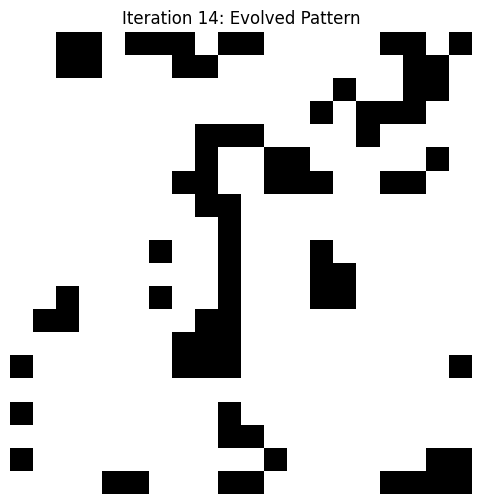

Updated weights:
[[-1.30059429e+04 -1.28085518e+04  8.63796428e+03 -3.46143542e+03
  -5.76739478e+03  8.49894691e+03 -4.24935469e+03 -8.18804005e+03
   9.71651180e+02  3.84414655e+03  1.65451530e+04  8.21046811e+03
  -2.68352088e+03  4.86369581e+03  3.97218321e+01 -1.47750762e+03
   8.64830639e+03 -5.51060318e+03 -1.27709598e+04  9.12051704e+03]
 [ 8.17406538e+03 -4.03194350e+03 -1.68598523e+03  1.09716762e+04
   6.44606292e+00  8.18518740e+03 -1.60843197e+04  1.38966181e+04
   9.10981977e+03 -3.42819067e+03  7.96547959e+03  7.97682979e+03
  -2.72526132e+03  4.87516602e+03  7.96550459e+03  3.72337680e+01
  -1.30162183e+04  8.55947300e+03  9.15441950e+03  8.75314762e+03]
 [ 8.15018828e+03  8.17474317e+03  2.62154788e+03  1.91772042e+03
  -1.96863019e+02  2.04166775e+03  7.51693779e+03  5.43786360e+03
  -7.34254094e+03 -4.52128510e+03  8.12485901e+03  4.87128112e+01
  -3.40472867e+03 -1.21623580e+04 -4.43394073e+03 -4.58024290e+03
  -1.39156130e+04 -3.70667634e+03  1.66722209e+04  8.1856

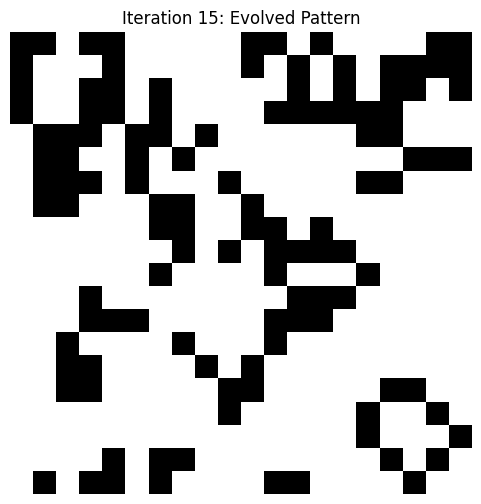

Updated weights:
[[-1.46937865e+04 -1.44963954e+04  8.63796428e+03 -5.14927901e+03
  -7.45523837e+03  8.49894691e+03 -4.24935469e+03 -8.18804005e+03
   9.71651180e+02  3.84414655e+03  1.48573094e+04  6.52262452e+03
  -2.68352088e+03  3.17585222e+03  3.97218321e+01 -1.47750762e+03
   8.64830639e+03 -5.51060318e+03 -1.44588033e+04  7.43267345e+03]
 [ 6.48622179e+03 -4.03194350e+03 -1.68598523e+03  1.09716762e+04
  -1.68139753e+03  8.18518740e+03 -1.60843197e+04  1.38966181e+04
   9.10981977e+03 -3.42819067e+03  6.27763600e+03  7.97682979e+03
  -4.41310491e+03  4.87516602e+03  6.27766100e+03  3.72337680e+01
  -1.47040618e+04  6.87162941e+03  7.46657591e+03  7.06530403e+03]
 [ 6.46234469e+03  8.17474317e+03  2.62154788e+03  2.29876832e+02
  -1.88470661e+03  2.04166775e+03  5.82909420e+03  5.43786360e+03
  -7.34254094e+03 -4.52128510e+03  8.12485901e+03  4.87128112e+01
  -5.09257226e+03 -1.21623580e+04 -6.12178432e+03 -4.58024290e+03
  -1.56034566e+04 -5.39451993e+03  1.66722209e+04  6.4978

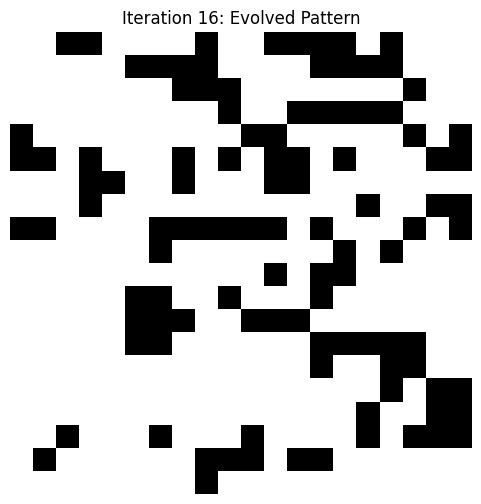

Updated weights:
[[-1.46937865e+04 -1.44963954e+04  5.86823423e+03 -7.91900906e+03
  -7.45523837e+03  8.49894691e+03 -4.24935469e+03 -8.18804005e+03
  -1.79807886e+03  3.84414655e+03  1.48573094e+04  3.75289448e+03
  -5.45325092e+03  4.06122175e+02 -2.73000821e+03 -1.47750762e+03
   5.87857635e+03 -5.51060318e+03 -1.44588033e+04  7.43267345e+03]
 [ 6.48622179e+03 -4.03194350e+03 -1.68598523e+03  1.09716762e+04
  -1.68139753e+03  5.41545735e+03 -1.88540497e+04  1.11268881e+04
   6.34008972e+03 -3.42819067e+03  6.27763600e+03  7.97682979e+03
  -4.41310491e+03  2.10543598e+03  3.50793096e+03 -2.73249628e+03
  -1.74737919e+04  6.87162941e+03  7.46657591e+03  7.06530403e+03]
 [ 6.46234469e+03  8.17474317e+03  2.62154788e+03  2.29876832e+02
  -1.88470661e+03  2.04166775e+03  5.82909420e+03  2.66813355e+03
  -1.01122710e+04 -7.29101514e+03  8.12485901e+03  4.87128112e+01
  -5.09257226e+03 -1.21623580e+04 -6.12178432e+03 -4.58024290e+03
  -1.56034566e+04 -8.16424997e+03  1.66722209e+04  6.4978

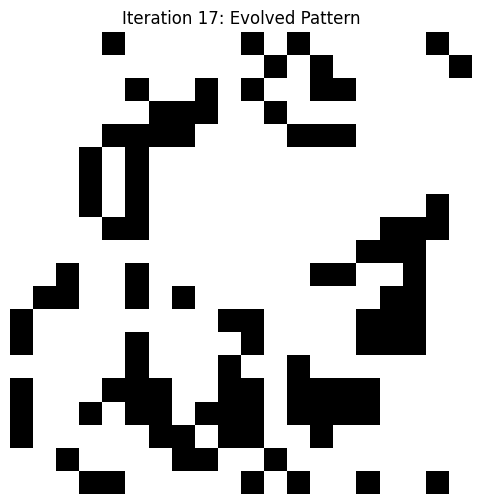

Updated weights:
[[-1.46937865e+04 -1.44963954e+04  5.86823423e+03 -7.91900906e+03
   7.85972148e+03  8.49894691e+03 -4.24935469e+03 -8.18804005e+03
  -1.79807886e+03  3.84414655e+03  3.01722693e+04  3.75289448e+03
   9.86170892e+03  4.06122175e+02 -2.73000821e+03 -1.47750762e+03
   5.87857635e+03 -5.51060318e+03  8.56156505e+02  7.43267345e+03]
 [ 6.48622179e+03 -4.03194350e+03 -1.68598523e+03  1.09716762e+04
  -1.68139753e+03  5.41545735e+03 -1.88540497e+04  1.11268881e+04
   6.34008972e+03 -3.42819067e+03  6.27763600e+03  2.32917896e+04
  -4.41310491e+03  1.74203958e+04  3.50793096e+03 -2.73249628e+03
  -1.74737919e+04  6.87162941e+03  7.46657591e+03  2.23802639e+04]
 [ 6.46234469e+03  8.17474317e+03  2.62154788e+03  2.29876832e+02
  -1.88470661e+03  1.73566276e+04  5.82909420e+03  2.66813355e+03
   5.20268886e+03 -7.29101514e+03  2.34398189e+04  4.87128112e+01
  -5.09257226e+03  3.15260187e+03  9.19317553e+03 -4.58024290e+03
  -1.56034566e+04 -8.16424997e+03  1.66722209e+04  6.4978

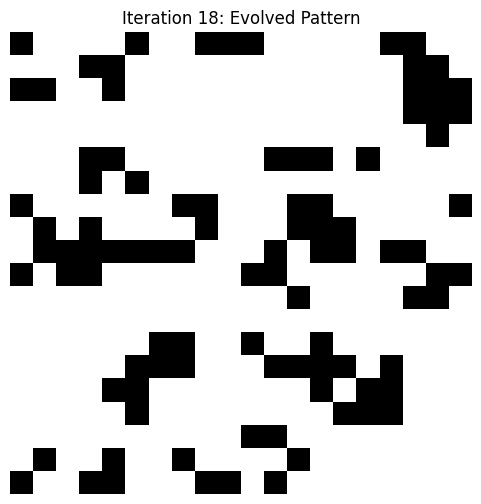

Updated weights:
[[-3.60520359e+04 -1.44963954e+04  5.86823423e+03 -7.91900906e+03
   7.85972148e+03 -1.28593025e+04 -4.24935469e+03 -8.18804005e+03
  -2.31563282e+04 -1.75141028e+04  8.81401989e+03  3.75289448e+03
   9.86170892e+03  4.06122175e+02 -2.73000821e+03 -1.47750762e+03
  -1.54796730e+04 -2.68688526e+04  8.56156505e+02  7.43267345e+03]
 [ 6.48622179e+03 -4.03194350e+03 -1.68598523e+03 -1.03865732e+04
  -2.30396469e+04  5.41545735e+03 -1.88540497e+04  1.11268881e+04
   6.34008972e+03 -3.42819067e+03  6.27763600e+03  2.32917896e+04
  -4.41310491e+03  1.74203958e+04  3.50793096e+03 -2.73249628e+03
  -1.74737919e+04 -1.44866200e+04 -1.38916735e+04  2.23802639e+04]
 [-1.48959047e+04 -1.31835062e+04  2.62154788e+03  2.29876832e+02
  -2.32429560e+04  1.73566276e+04  5.82909420e+03  2.66813355e+03
   5.20268886e+03 -7.29101514e+03  2.34398189e+04  4.87128112e+01
  -5.09257226e+03  3.15260187e+03  9.19317553e+03 -4.58024290e+03
  -1.56034566e+04 -2.95224993e+04 -4.68602849e+03 -1.4860

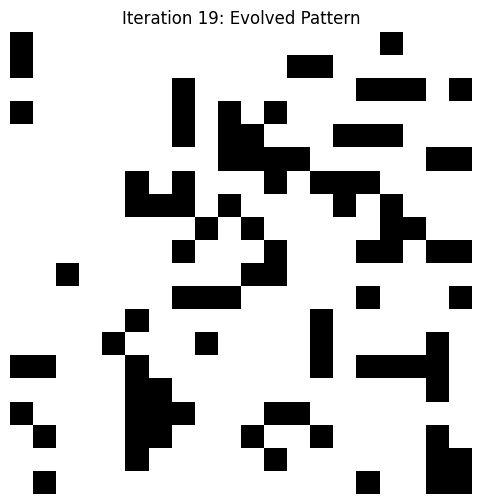

Updated weights:
[[-2.75959161e+04 -1.44963954e+04  5.86823423e+03 -7.91900906e+03
   7.85972148e+03 -1.28593025e+04 -4.24935469e+03 -8.18804005e+03
  -2.31563282e+04 -1.75141028e+04  8.81401989e+03  3.75289448e+03
   9.86170892e+03  4.06122175e+02 -2.73000821e+03 -1.47750762e+03
  -7.02355322e+03 -2.68688526e+04  8.56156505e+02  7.43267345e+03]
 [ 1.49423416e+04 -4.03194350e+03 -1.68598523e+03 -1.03865732e+04
  -2.30396469e+04  5.41545735e+03 -1.88540497e+04  1.11268881e+04
   6.34008972e+03 -3.42819067e+03  6.27763600e+03  2.32917896e+04
   4.04301490e+03  2.58765156e+04  3.50793096e+03 -2.73249628e+03
  -1.74737919e+04 -1.44866200e+04 -1.38916735e+04  2.23802639e+04]
 [-1.48959047e+04 -1.31835062e+04  2.62154788e+03  2.29876832e+02
  -2.32429560e+04  1.73566276e+04  5.82909420e+03  1.11242534e+04
   5.20268886e+03 -7.29101514e+03  2.34398189e+04  4.87128112e+01
  -5.09257226e+03  3.15260187e+03  9.19317553e+03  3.87587690e+03
  -7.14733681e+03 -2.10663795e+04 -4.68602849e+03 -6.4043

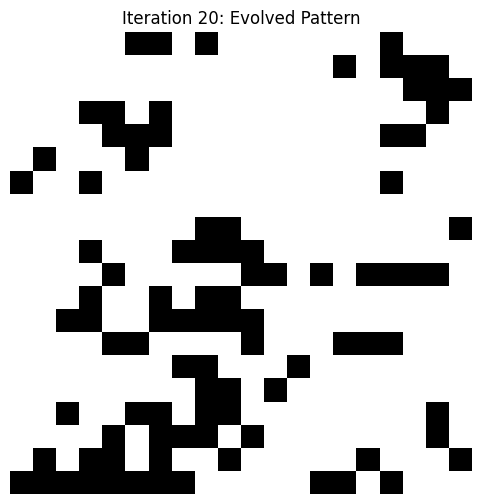

Updated weights:
[[-2.75959161e+04 -1.44963954e+04  5.86823423e+03 -7.91900906e+03
   7.85972148e+03 -6.12507552e+03  2.48487225e+03 -8.18804005e+03
  -1.64221013e+04 -1.75141028e+04  8.81401989e+03  3.75289448e+03
   9.86170892e+03  4.06122175e+02 -2.73000821e+03 -1.47750762e+03
  -2.89326278e+02 -2.68688526e+04  8.56156505e+02  7.43267345e+03]
 [ 1.49423416e+04 -4.03194350e+03 -1.68598523e+03 -1.03865732e+04
  -2.30396469e+04  5.41545735e+03 -1.88540497e+04  1.11268881e+04
   6.34008972e+03 -3.42819067e+03  6.27763600e+03  2.32917896e+04
   4.04301490e+03  2.58765156e+04  1.02421579e+04 -2.73249628e+03
  -1.07395650e+04 -7.75239302e+03 -7.15744653e+03  2.23802639e+04]
 [-1.48959047e+04 -1.31835062e+04  2.62154788e+03  2.29876832e+02
  -2.32429560e+04  1.73566276e+04  5.82909420e+03  1.11242534e+04
   5.20268886e+03 -7.29101514e+03  2.34398189e+04  4.87128112e+01
  -5.09257226e+03  3.15260187e+03  9.19317553e+03  3.87587690e+03
  -7.14733681e+03 -1.43321526e+04  2.04819845e+03  3.2991

In [11]:
def main():
    grid_size = (20, 20)
    model = PreferenceModel(grid_size)
    num_iterations = 20

    for iteration in range(num_iterations):
        # Generate an initial pattern
        pattern = initialize_pattern(grid_size)
        evolved_pattern = simulate_game(pattern, steps=5)

        # Display the evolved pattern
        print(f"Iteration {iteration + 1}")
        display_pattern(evolved_pattern, title=f"Iteration {iteration + 1}: Evolved Pattern")

        # Collect user feedback
        user_feedback = get_user_feedback(evolved_pattern)

        # Update the model based on feedback
        model.update_weights(evolved_pattern, user_feedback)

        print(f"Updated weights:\n{model.weights}\n")

if __name__ == "__main__":
    main()
